In [ ]:
'''
обозначение города(city) в api:
'e' - Екатеринбург
'n' - Нижний Новгород
'v': Владимир
'y' - Ярославль
'''

In [ ]:
!pip install httpx plotly kaleido

In [103]:
from PIL import Image
import httpx
import io
import plotly.graph_objects as go
colors = ['#33a0ff', '#33aaff', '#33b4ff', '#33beff', '#33c8ff', '#33d2ff', '#33dcff', '#33e6ff', '#33f0ff', '#33faff'][::-1]
def return_diagram_image(out, colors):
    names = [i['name'] for i in out][::-1]
    probs = [i['probs'] for i in out][::-1]
    colors = colors[:len(names)]
    fig = go.Figure(data=[go.Bar(y=names, x=probs, marker_color=colors, orientation='h')])

        # Add titles and labels
    fig.update_layout(title='',
                          xaxis_title='Вероятность',
                          yaxis_title='Название')
    img_bytes = fig.to_image(format="png")
    img = Image.open(io.BytesIO(img_bytes))
    return img


In [104]:
API_URL = 'https://node-api.datasphere.yandexcloud.net'
X_NODE_ID = 'bt162oc8pa1upv6u39g3'
X_FOLDER_ID = 'b1g8eh6dhbr3jt8au86a'
IAM_TOKEN = 'PUT YOUR TOKEN'

In [105]:
text = "церковь"
city_letter = 'n'

In [106]:
async with httpx.AsyncClient() as client:
        resp = await client.post(
            f"{API_URL}/text?",
            headers={
                "x-node-id": X_NODE_ID,
                "Authorization": f"Bearer {IAM_TOKEN}",
                "x-folder-id": X_FOLDER_ID
            },
            json={"text": text, "city": city_letter},
        )
        response_json_categories = resp.json()

In [107]:
response_json_categories

[{'name': 'Казанская церковь (Кстово)',
  'probs': 0.20118318498134613,
  'coord': [44.172501, 56.181389],
  'xid': 'Q96240614',
  'category': 'religion'},
 {'name': 'Храм святителей Московских',
  'probs': 0.20096348226070404,
  'coord': [43.997238, 56.312874],
  'xid': 'R5393060',
  'category': 'religion'},
 {'name': 'Храм Сергия Радонежского',
  'probs': 0.20090050995349884,
  'coord': [43.987236, 56.323441],
  'xid': 'W147129128',
  'category': 'religion'},
 {'name': 'Церковь Знамения Божией Матери и святых Жен-Мироносиц',
  'probs': 0.19884654879570007,
  'coord': [43.995018, 56.324314],
  'xid': 'W52464978',
  'category': 'religion'},
 {'name': 'Церковь во имя Всемирлостивейшего Спаса',
  'probs': 0.19810636341571808,
  'coord': [44.024479, 56.319065],
  'xid': 'W151905901',
  'category': 'religion'}]

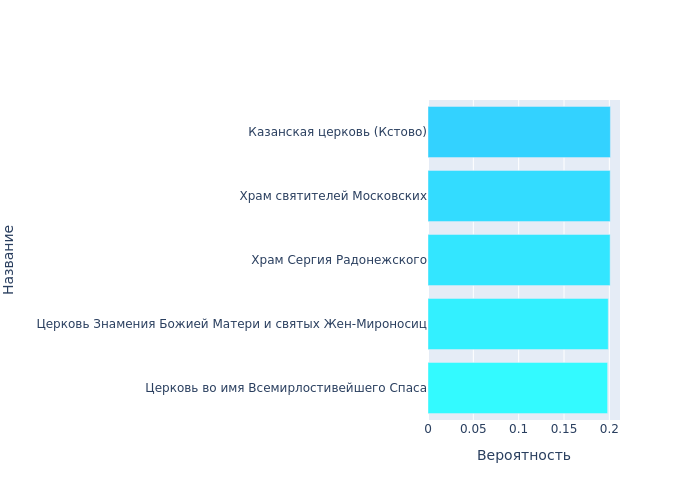

In [108]:
return_diagram_image(response_json_categories, colors)

In [121]:
image = Image.open('images/image1.jpg')
city_letter = 'e'
img_byte_arr = io.BytesIO()
image.save(img_byte_arr, format='PNG')
img_bytes = img_byte_arr.getvalue()

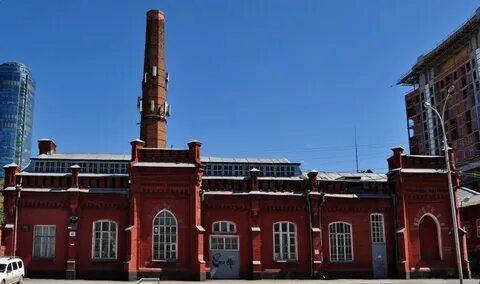

In [122]:
image

In [123]:
async with httpx.AsyncClient() as client:
        resp = await client.post(
            f"{API_URL}/image?city={city_letter}",
            headers={
                "x-node-id": X_NODE_ID,
                "Authorization": f"Bearer {IAM_TOKEN}",
                "x-folder-id": X_FOLDER_ID
            },
            files={"file": ('image.jpg', img_bytes, 'image/jpeg')},
        )
        response_json_categories = resp.json()

In [124]:
response_json_categories

[{'name': '№28 Здание городской электростанции «Луч»',
  'probs': 0.22001537680625916,
  'coords': [60.60743, 56.833691],
  'xid': 'N1930476141',
  'category': 'architecture'},
 {'name': 'Усадьба Железнова',
  'probs': 0.19829750061035156,
  'coords': [60.612778, 56.826111],
  'xid': 'Q4477566',
  'category': 'architecture'},
 {'name': 'Здание пансиона и церкви Святой Магдалины при первой женской гимназии',
  'probs': 0.19553233683109283,
  'coords': [60.610462, 56.837254],
  'xid': 'Q27890571',
  'category': 'other'},
 {'name': '№29 Дом В.И. Чувильдина',
  'probs': 0.19370640814304352,
  'coords': [60.607689, 56.832268],
  'xid': 'N533609312',
  'category': 'architecture'},
 {'name': 'Доходный дом купца Чувильдина',
  'probs': 0.19244840741157532,
  'coords': [60.607727, 56.832176],
  'xid': 'W59804593',
  'category': 'architecture'}]

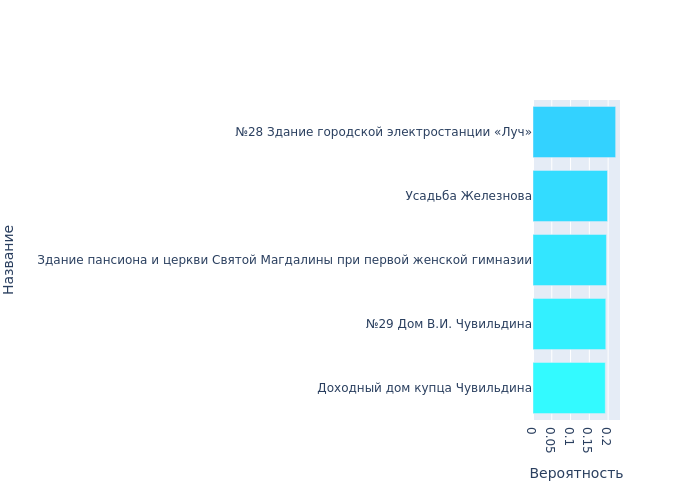

In [128]:
return_diagram_image(response_json_categories, colors)